# Activity in a git Repository

We are going to see commit activity in a git repository. The dataset comes from JUnit 4, created by using the git log command:

``git log --date=iso --pretty=format:"%h%x09%aN%x09%aE%x09%ad%x09%s"``

## Setting Up

In [1]:
import pandas as pd
import calendar
activity = pd.read_csv("../datasets/git_log_junit4.gz",
                       sep="\t",
                       names=["hash", "author", "author_mail", "date", "comment"])

## Exploring Data


In [2]:
activity.head()

,hash,author,author_mail,date,comment
0,3a5c6b4d,Rahul Nagekar,rahul.nagekar1@gmail.com,2020-08-02T23:54:18+05:30,Deprecated since jdk9 replacing constructor in...
1,714019f4,Kevin Cooney,kcooney@users.noreply.github.com,2020-08-02T11:23:20-07:00,Merge pull request #1669 from pholser/issues/1...
2,5be301c6,Paul Holser,holser@railroad19.com,2020-07-20T09:45:28-05:00,Make FrameworkField ctor public. Fixes #1668
3,c53a2773,Paul Holser,holser@railroad19.com,2020-07-20T09:42:31-05:00,Bump to 4.14-SNAPSHOT
4,bef3bcaa,Marc Philipp,mail@marcphilipp.de,2020-06-21T19:10:39+02:00,"Replace ""master"" with ""main"""


### Formatting Dates

We may try to show commits based on the date. But we have a problem with that column, it is not defined as a date type.

In [3]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hash         2437 non-null   object
 1   author       2437 non-null   object
 2   author_mail  2437 non-null   object
 3   date         2437 non-null   object
 4   comment      2437 non-null   object
dtypes: object(5)
memory usage: 47.7+ KB


We only need to transform using the correct format.

In [4]:
activity["date"] = pd.to_datetime(activity["date"], utc=True, format="%Y-%m-%d %H:%M:%S")
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   hash         2437 non-null   object             
 1   author       2437 non-null   object             
 2   author_mail  2437 non-null   object             
 3   date         2437 non-null   datetime64[ns, UTC]
 4   comment      2437 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 57.2+ KB


## Data by Date

### By Day

In [5]:
commits_per_day = activity["date"].dt.date
commits_per_day = commits_per_day.value_counts().rename_axis("date").reset_index(name='commits')
commits_per_day = commits_per_day.sort_values("date")
commits_per_day = commits_per_day.set_index("date")
commits_per_day.head()

,commits
date,
2000-12-03,2
2000-12-09,2
2000-12-11,2
2001-01-09,1
2001-01-10,1


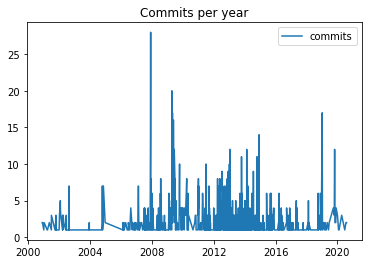

In [6]:
ax = commits_per_day.plot.line()
ax.set_title("Commits per year")
ax.axes.get_xaxis().get_label().set_visible(False)

### By Month

In [7]:
commits_per_month = activity["date"].dt.month
commits_per_month = commits_per_month.value_counts().rename_axis("month").reset_index(name='commits')
commits_per_month = commits_per_month.sort_values("month")
commits_per_month = commits_per_month.set_index("month")
commits_per_month.head()

,commits
month,
1,234
2,167
3,143
4,231
5,254


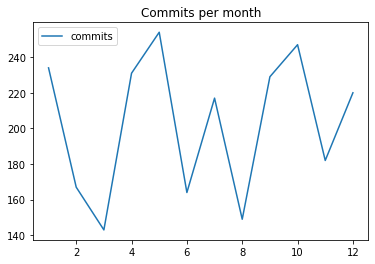

In [8]:
ax = commits_per_month.plot.line()
ax.set_title("Commits per month")
ax.axes.get_xaxis().get_label().set_visible(False)

### By Hour

In [9]:
commits_per_hour = activity["date"].dt.hour
commits_per_hour = commits_per_hour.value_counts().rename_axis("hour").reset_index(name='commits')
commits_per_hour = commits_per_hour.sort_values("hour")
commits_per_hour = commits_per_hour.set_index("hour")
commits_per_hour.head()

,commits
hour,
0,72
1,58
2,85
3,69
4,70


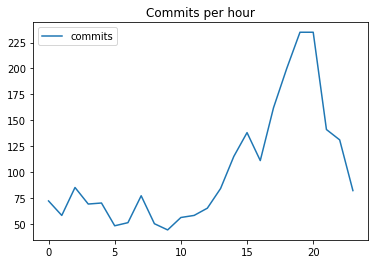

In [10]:
ax = commits_per_hour.plot.line()
ax.set_title("Commits per hour")
ax.axes.get_xaxis().get_label().set_visible(False)